데이터 전처리

In [200]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [201]:
datasets = pd.read_csv("D:/_data/dacon/penquin/train.csv")
test_file = pd.read_csv("D:/_data/dacon/penquin/test.csv")
submit = pd.read_csv("D:/_data/dacon/penquin/sample_submission.csv")

# datasets = datasets.drop(index=[8, 10, 20, 72, 111])
# test_file = test_file.drop([test_file.index])
# datasets

In [202]:
x = datasets.drop(columns=["id", "Body Mass (g)", 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis=1)  # 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
y = datasets["Body Mass (g)"]

test_file = test_file.drop(columns=["id", 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis=1)

In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Species'] = le.fit_transform(x['Species'])
x['Island'] = le.fit_transform(x['Island'])
x['Clutch Completion'] = le.fit_transform(x['Clutch Completion'])
# x['Sex'] = le.fit_transform(x['Sex'])

test_file['Species'] = le.fit_transform(test_file['Species'])
test_file['Island'] = le.fit_transform(test_file['Island'])
test_file['Clutch Completion'] = le.fit_transform(test_file['Clutch Completion'])
# test_file['Sex'] = le.fit_transform(test_file['Sex'])


In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=66)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

test_file = scaler.transform(test_file)
print(x.shape, y.shape)

(114, 6) (114,)


모델 구성

In [205]:
model = Sequential()
model.add(Dense(356, input_dim=x.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

훈련

In [206]:
model.compile(loss='mse', optimizer='adam')
es = EarlyStopping(monitor='val_loss', patience=50, mode='min', restore_best_weights=True)
hist = model.fit(x_train, y_train, epochs=1000, batch_size=3, validation_split=0.2, callbacks=[es])

Epoch 1/1000
24/24 [==============================] - 1s 6ms/step - loss: 19922008.0000 - val_loss: 16711512.0000
Epoch 2/1000
24/24 [==============================] - 0s 2ms/step - loss: 19852560.0000 - val_loss: 16594875.0000
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 19134290.0000 - val_loss: 15486237.0000
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: 14676849.0000 - val_loss: 9593671.0000
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 4675608.5000 - val_loss: 3504023.2500
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 2795732.0000 - val_loss: 3038069.2500
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 2859826.5000 - val_loss: 2429754.0000
Epoch 8/1000
24/24 [==============================] - 0s 2ms/step - loss: 2206932.5000 - val_loss: 2118194.0000
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: 2217478.7500 - val_loss

In [207]:
loss = model.evaluate(x_test, y_test)
print("loss : ", loss)
results = model.predict(x_test)

from sklearn.metrics import mean_squared_error
def RMSE(y_test, results):
    return np.sqrt(mean_squared_error(y_test, results))
rmse = RMSE(y_test, results)
print("RMSE : ", rmse)

1/1 [==============================] - 0s 14ms/step - loss: 176866.8281
loss :  176866.828125
RMSE :  420.5552952552616


결과 loss값 시각화

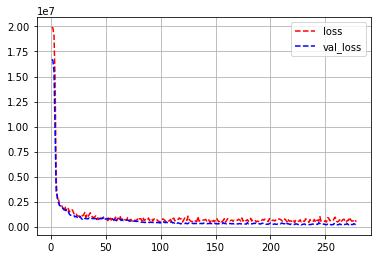

In [208]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r--', label="loss")
plt.plot(epochs, val_loss, 'b--', label="val_loss")

plt.grid()
plt.legend()
plt.show()

제출

In [209]:
results = model.predict(test_file)
submit['Body Mass (g)'] = results
submit.to_csv("D:/_data/dacon/penquin/submit.csv", index=False)